<a href="https://colab.research.google.com/github/TugcenB/Sound_Classification/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building Convolutional Neural Network

##Import Required Libraries

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

##Prepare The Dataset

We already prepared X_train, y_train, X_val, y_val, X_test ve y_test dataset in Preprocessing 

In [19]:
X_train = np.load('/content/drive/MyDrive/X_train_cv.npy')
X_test = np.load('/content/drive/MyDrive/X_test_cv.npy')
X_val = np.load('/content/drive/MyDrive/X_val_cv.npy')

y_train = pd.read_csv('/content/drive/MyDrive/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/y_test.csv')
y_val = pd.read_csv('/content/drive/MyDrive/y_val.csv')

In [20]:
print(X_test[789])

[[[  0   0   0]
  [ 12  12  12]
  [ 58  58  58]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [ 18  18  18]
  [ 79  79  79]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [ 17  17  17]
  [ 77  77  77]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [ 41  41  41]
  [164 164 164]
  ...
  [ 13  13  13]
  [ 17  17  17]
  [ 12  12  12]]

 [[  0   0   0]
  [ 44  44  44]
  [179 179 179]
  ...
  [ 33  33  33]
  [ 24  24  24]
  [ 24  24  24]]

 [[ 17  17  17]
  [ 60  60  60]
  [214 214 214]
  ...
  [ 68  68  68]
  [ 59  59  59]
  [ 65  65  65]]]


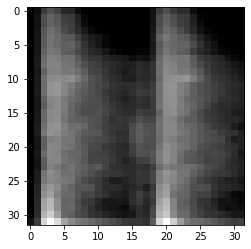

(32, 32, 3)


In [21]:
plt.imshow(X_test[789])
plt.show()
# Print the shape of the sample image
print(X_test[789].shape)

##Constructing Neural Network

In [23]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

In [36]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 ))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 ))
model.add(tf.keras.layers.Flatten())


model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10,activation="softmax"))


In [43]:
model.compile(optimizer="adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [44]:
results = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data=(X_val, y_val))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


InvalidArgumentError: ignored

In [32]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")
# Put legend table
plt.legend()

# Show the plot
plt.show()

NameError: ignored